Let's look at the images that get generated by the tutorial at https://pipelines.lsst.io/getting-started/display.html

need to:

`setup lsst_distrib`

`setup -j ci_hsc -t $USER`

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pylab as plt
import os

import lsst.daf.persistence as dafPersist
import lsst.afw.display as afwDisplay

afwDisplay.setDefaultBackend("matplotlib")

In [19]:
# Path to my data
scratch_dir = '/Users/yoachim/Scratch/Stack_Learn'
full_path = os.path.join(scratch_dir, 'DATA/rerun/processCcdOutputs')
# The illustrious Butler
butler = dafPersist.Butler(inputs=full_path)

In [3]:
# example of query metadata
butler.queryMetadata('calexp', ['visit', 'ccd'], dataId={'filter': 'HSC-R'})

[(903334, 16),
 (903334, 22),
 (903334, 23),
 (903334, 100),
 (903336, 17),
 (903336, 24),
 (903338, 18),
 (903338, 25),
 (903342, 4),
 (903342, 10),
 (903342, 100),
 (903344, 0),
 (903344, 5),
 (903344, 11),
 (903346, 1),
 (903346, 6),
 (903346, 12)]

In [4]:
# Get a single raw image
raw = butler.get('raw', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})

<IPython.core.display.Javascript object>


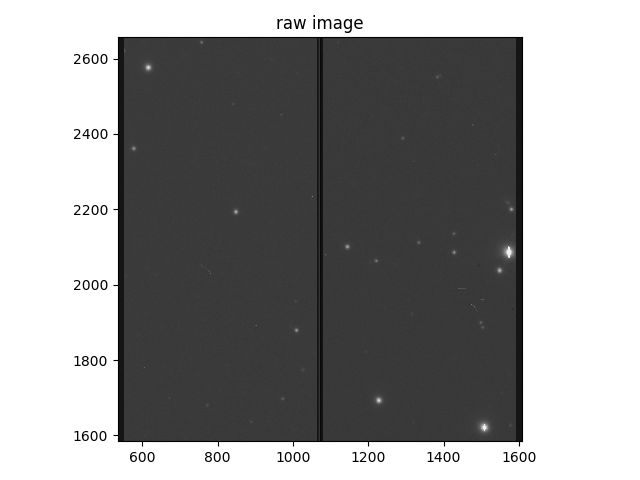

In [5]:
# Useful example notebook for matplotlib display at: 
# https://github.com/lsst/display_matplotlib/blob/master/examples/display_matplotlib.ipynb
disp = afwDisplay.Display(backend="matplotlib")
disp.scale("asinh", "zscale")
title="raw image"
disp.mtv(raw, title=title)
disp.zoom(4)

Need to stop interaction before going on to next display

<IPython.core.display.Javascript object>


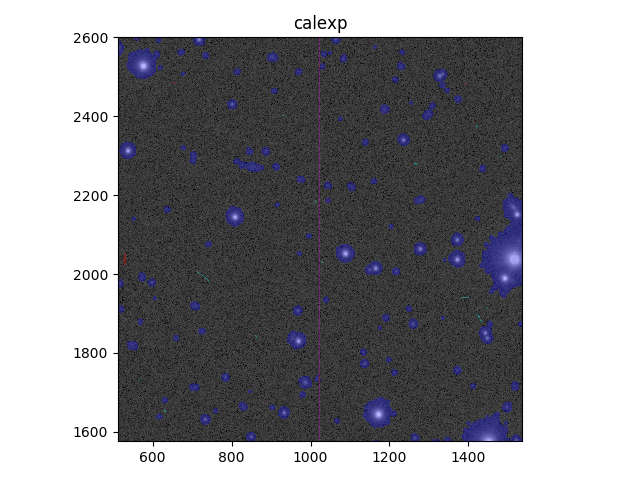

In [6]:

calexp = butler.get('calexp', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})
disp2 = afwDisplay.Display(backend="matplotlib")
disp2.scale("asinh", "zscale")
disp2.mtv(calexp, title='calexp')
disp2.zoom(4)

<IPython.core.display.Javascript object>


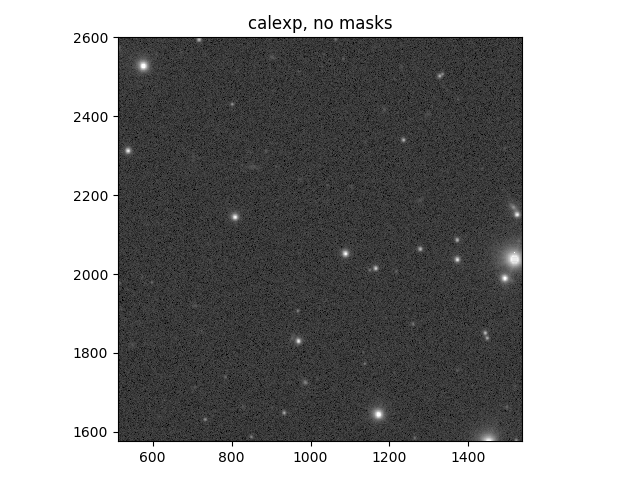

In [7]:

calexp = butler.get('calexp', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})
display = afwDisplay.Display(backend="matplotlib")
display.setMaskTransparency(100)  # This needs to be before the mtv call
display.scale("asinh", "zscale")
display.mtv(calexp, title='calexp, no masks')
display.zoom(4)

<IPython.core.display.Javascript object>


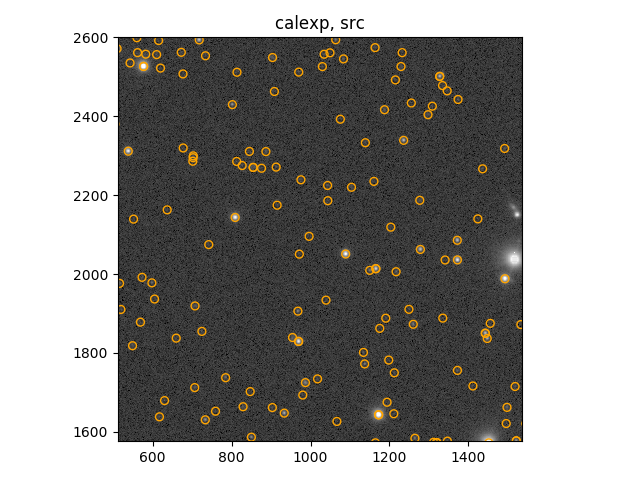

In [8]:
# Use the butler to get the source catalog
src = butler.get('src', dataId={'filter': 'HSC-R', 'visit': 903334, 'ccd': 23})

display = afwDisplay.Display(backend="matplotlib")
display.setMaskTransparency(100)  # This needs to be before the mtv call
display.scale("asinh", "zscale")

display.mtv(calexp, title='calexp, src')

display.zoom(4)
with display.Buffering():
    for s in src:
        display.dot("o", s.getX(), s.getY(), size=10, ctype='orange')

# I'm not sure if these sources are from the reference catalog, or detected, or both?

<IPython.core.display.Javascript object>


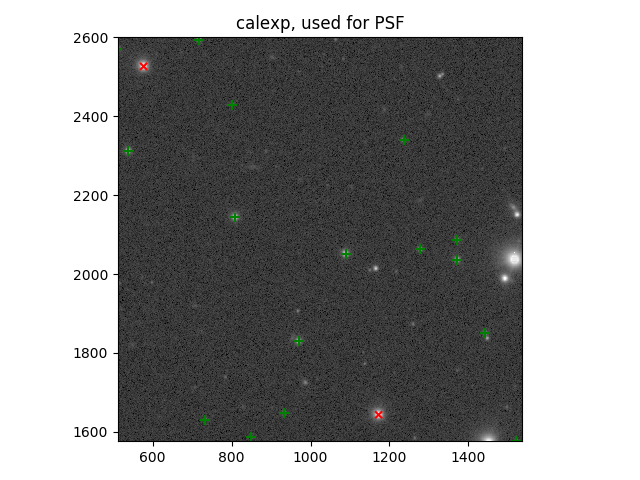

In [9]:
display = afwDisplay.Display(backend="matplotlib")
display.scale("asinh", "zscale")
display.setMaskTransparency(100)
display.mtv(calexp, title='calexp, used for PSF')
display.zoom(4)

# WTF? Why would you use red-x to show things that were used?
# Reversing what the tutorial does

with display.Buffering():
    for s in src[src['calib_psfUsed']]:
        display.dot("+", s.getX(), s.getY(), size=10, ctype='green')

rejectedPsfSources = src[src['calib_psfCandidate'] &
                         (src['calib_psfUsed'] == False)]
with display.Buffering():
    for s in rejectedPsfSources:
        display.dot("x", s.getX(), s.getY(), size=10, ctype='red')

In [40]:
# Can I grab the WCS and get the coordinates of 1000,2000?
wcs = calexp.getWcs()
spot_of_interest = wcs.pixelToSky(1000, 2000)

In [20]:
# Pretty sure this is supposed to work
butler.getKeys()

AttributeError: 'NoneType' object has no attribute 'find'

In [21]:
butler.getKeys('deepCoadd')

{'filter': str, 'patch': str, 'tract': int}

In [22]:
coadd = butler.get('deepCoadd', dataId={'patch': '0,1', 'tract': 0, 'filter': 'HSC-R'})

NoResults: No locations for get: datasetType:deepCoadd dataId:DataId(initialdata={'patch': '0,1', 'tract': 0, 'filter': 'HSC-R'}, tag=set())

In [23]:
# Do I need to setup a new butler?
full_path = os.path.join(scratch_dir, 'DATA/rerun/coadd')
butler = dafPersist.Butler(inputs=full_path)


<IPython.core.display.Javascript object>


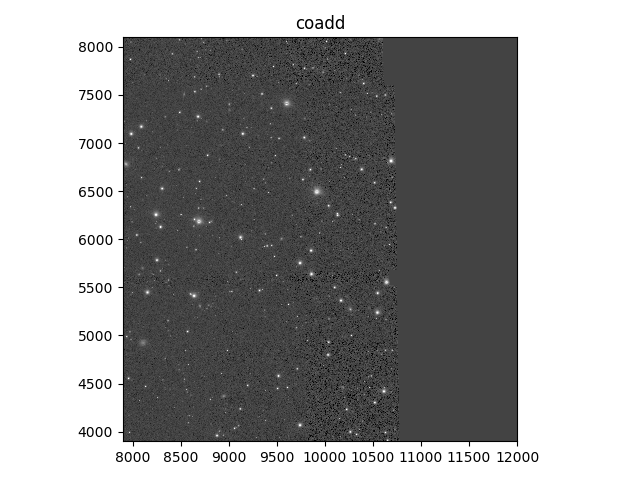

In [47]:
coadd = butler.get('deepCoadd', dataId={'patch': '2,1', 'tract': 0, 'filter': 'HSC-R'})
display = afwDisplay.Display(backend="matplotlib")
display.setMaskTransparency(100)  # This needs to be before the mtv call
display.scale("asinh", "zscale")
display.mtv(coadd, title='coadd')
#display.zoom(4)

In [45]:
# Need to figure out what the coordinates of my spot are.
wcs = coadd.getWcs()
wcs.skyToPixel(spot_of_interest)
# Hmm, looks like all the WCS are the same on the patches. Nifty. 

Point2D(8644.028386, 6685.557776)

<IPython.core.display.Javascript object>


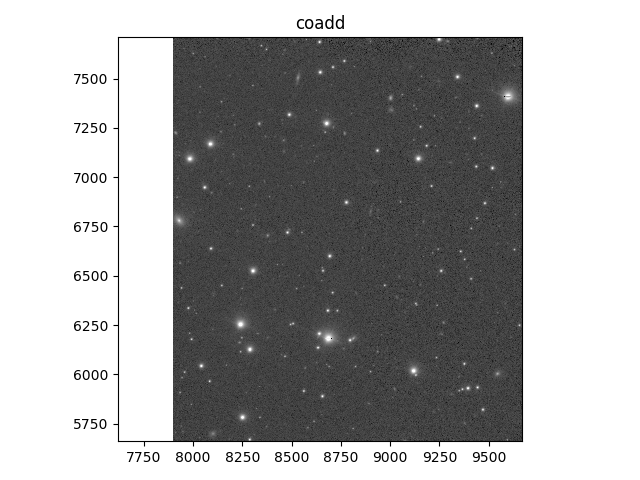

In [50]:
display = afwDisplay.Display(backend="matplotlib")
display.setMaskTransparency(100)  # This needs to be before the mtv call
display.scale("asinh", "zscale")
display.mtv(coadd, title='coadd')
display.pan(8644, 6685)
display.zoom(4)

In [49]:
help(display.pan)

Help on method pan in module lsst.afw.display.interface:

pan(colc=None, rowc=None, origin=ImageOrigin.PARENT) method of lsst.afw.display.interface.Display instance
    !Pan to (rowc, colc); see also zoom

